<a href="https://colab.research.google.com/github/toha993/Algorithmic_Toolbox/blob/master/naivebayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import glob
import pandas as pd
import numpy as np
import os

In [2]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
import re 

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
import joblib

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
path = "/content/drive/MyDrive/songData/*.xlsx"
all_file = glob.glob(path)

In [7]:
all_file

['/content/drive/MyDrive/songData/songType0.xlsx',
 '/content/drive/MyDrive/songData/songType1.xlsx',
 '/content/drive/MyDrive/songData/songType2.xlsx',
 '/content/drive/MyDrive/songData/songType10.xlsx',
 '/content/drive/MyDrive/songData/songType12.xlsx',
 '/content/drive/MyDrive/songData/songType8.xlsx',
 '/content/drive/MyDrive/songData/songType13.xlsx',
 '/content/drive/MyDrive/songData/songType15.xlsx',
 '/content/drive/MyDrive/songData/songType7.xlsx',
 '/content/drive/MyDrive/songData/songType14.xlsx',
 '/content/drive/MyDrive/songData/songType5.xlsx',
 '/content/drive/MyDrive/songData/songType16.xlsx',
 '/content/drive/MyDrive/songData/songType3.xlsx',
 '/content/drive/MyDrive/songData/songType4.xlsx',
 '/content/drive/MyDrive/songData/songType6.xlsx',
 '/content/drive/MyDrive/songData/songType9.xlsx',
 '/content/drive/MyDrive/songData/songType11.xlsx',
 '/content/drive/MyDrive/songData/songType20.xlsx',
 '/content/drive/MyDrive/songData/songType17.xlsx',
 '/content/drive/MyDri

In [8]:
names = []
count = []
clusters = []
data = []

for each in all_file:
    temp = pd.read_excel(each)
    
    
    count.append(len(temp))
    names.append(each.split('/')[1][:-5])
    clusters.append(temp['songType'])
    
    
    data.append(temp)
    
cluster_ids =clusters

In [9]:
data = pd.concat(data)
data = data.sample(frac = 1)

data

,Unnamed: 0,lyrics,songType
78,1215,"আজ প্রথম ফুলের পাব প্রসাদখানি, তাই ভোরে ...",17
105,554,তুমি আমার ছায়া ঢাকা পাখি ডানা গ্রাম তুমি আমার...,1
166,675,আজ চঞ্চল মন যদি মৌমাছি হয়ে চায় ক্ষতি কি ? গুণ ...,3
369,2278,এসো ওয়াদা করি তুমি আমি দু’জনে ভালোবাসা জেগে র...,3
170,1333,"মিষ্টি মেয়ে , চোখটি তোলো প্রথম তোমার সাথে দেখা...",13
...,...,...,...
38,366,আমার আপনার চেয়ে আপন যে জন খুঁজি তারে আমি আপনায়...,7
524,2392,যা যা ফেরারী মন ছেড়ে স্মৃতির কোন সব পাখি উড়েযা...,1
622,2651,"(এই ঠাকুর পো, এই সব কী করে বেড়াচ্ছো দাঁড়াও, আজ...",1
501,2829,আকাশ নীলা তুমি বল কিভাবে আমার শূণ্য মনে সুখ ছড়...,13


In [10]:
stop_words = [ 'হাই', 'ফ্রিকুয়েন্সি', 'কিন্তু', 'অপ্রয়োজনীয়', 'শব্দ' ]

In [11]:
data['lyrics'] = data['lyrics'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [12]:
X_train, X_test, y_train, y_test =  train_test_split(data['lyrics'], data['songType'], test_size=0.33, random_state=42 )

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import metrics

total_data_count = len(data)
per_class_counts = []
unique_classes = np.unique(data['songType'].values)
class_count_mean = np.mean(count)

###########################3
############### classifier setup ################

from sklearn.naive_bayes import MultinomialNB
text_clf_svm = Pipeline([
    
    ('vect', CountVectorizer(
                            analyzer="word", 
                            lowercase=False,
                            token_pattern="[\S]*",
                            tokenizer=None,
                            ngram_range=(1, 3),
                            preprocessor=None)),                 
    ('tfidf', TfidfTransformer()),
    ('clf-svm',MultinomialNB(alpha = 0.001)),
                                                                        
])
classifier = text_clf_svm.fit(list(X_train), list(y_train))


cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
score = cross_val_score(text_clf_svm, list(X_train), list(y_train), cv=cv)

print("Cross Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


predicted = classifier.predict(X_test)

In [22]:
print("Cross Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print(metrics.classification_report(y_test, predicted))

Cross Accuracy: 0.54 (+/- 0.01)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.48      0.62      0.55       336
           2       0.00      0.00      0.00         4
           3       0.47      0.55      0.51       244
           4       0.00      0.00      0.00         2
           5       0.33      0.06      0.10        17
           6       0.65      0.38      0.48        29
           7       0.78      0.60      0.68        70
           8       0.00      0.00      0.00         4
           9       0.50      0.10      0.17        20
          10       0.14      0.07      0.09        15
          11       0.19      0.18      0.18        17
          12       0.07      0.03      0.04        39
          13       0.62      0.53      0.57       253
          14       0.44      0.17      0.25        23
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
import pandas as pd
confusion_matrix = list(metrics.confusion_matrix(y_test, predicted))

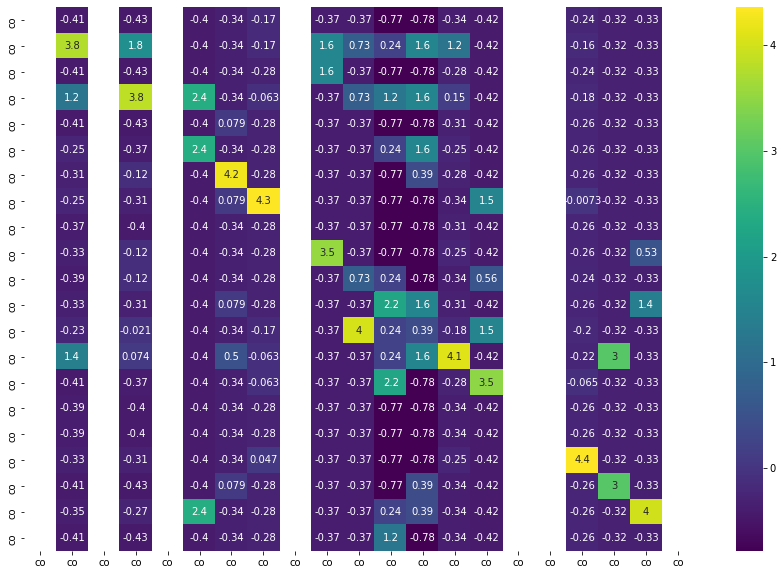

In [24]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = confusion_matrix
df_cm = pd.DataFrame(array, index = [i for i in names],
              columns = [i for i in names])
df_norm_col=(df_cm-df_cm.mean())/df_cm.std()
#df_norm_col=df_cm-df_cm.mean()
plt.figure(figsize = (15,10))
sn.heatmap(df_norm_col, annot=True,cmap='viridis')